## Langevin equation: harmonic and FENE potentials

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### a) Solve the Langevin equations numerically

In [134]:
GAMMA = 1/10**-8 #s
M = 10**-17 #kg
V_TH = 0.02 #m/s
W0 = 0.1*GAMMA
R0 = V_TH/W0
K = np.power(0.1*GAMMA, 2) * M

p_0 = 1*M
r_0 = 0 
t_span = 10**-4
dt = (10**-2)*(1/GAMMA)

In [135]:
parameters = {
    'gamma': GAMMA,
    'm': M,
    'v_th': V_TH,
    'w0': W0,
    'r0': R0,
    'k': K
}

In [136]:
class Langevin():
    def __init__(self, parameters, pot_method='harmonic'):
        self.gamma = parameters['gamma']
        self.m = parameters['m']
        self.v_th = parameters['v_th']
        self.w0 = parameters['w0']
        self.r0 = parameters['r0']
        self.k = parameters['k']
        self.pot_method = pot_method
        self.r, self.p = None, None
        self.num_steps = None
    
    def __harmonic_pot_deriv(self, r):
        return self.k*r
    
    def __fene_pot_deriv(self, r):
        return (self.k*r) / (1 - np.power(r/self.r0, 2))
    
    def __euler_maruyama(self, deriv_pot, t_span, dt, p_0, r_0=0):
        r = [r_0, ]
        p = [p_0, ]

        self.num_steps = np.linspace(0, t_span, int(t_span/dt)+1)

        for i in range(1, len(self.num_steps)):
            r.append(r[i-1] + p[i-1]*dt/self.m)
            p.append(p[i-1] - deriv_pot(r[i-1])*dt - self.gamma*p[i-1]*dt + np.sqrt(2*self.gamma*dt)*self.v_th*self.m*np.random.normal(0,1))

        return np.array(r), np.array(p)
    
    def solve(self, t_span, dt, p_0, r_0):
        if (self.pot_method == 'harmonic'):
            self.r, self.p = self.__euler_maruyama(self.__harmonic_pot_deriv, t_span, dt, p_0, r_0=0) 
        
        elif (self.pot_method == 'fene'):
            self.r, self.p = self.__euler_maruyama(self.__fene_pot_deriv, t_span, dt, p_0, r_0=0)
    
        return self

    def rms(self, limit):
        return np.sqrt(np.mean(np.power(self.r[limit:], 2)))

    def kinetic_energy(self, limit):
        return np.mean(np.power(self.p[limit:], 2))/2*self.m
    
    def plot(self):
        t = self.num_steps
        fig, axs = plt.subplots(3, 1, figsize=(10, 20))
        
        axs[0].plot(t, self.r)
        axs[0].set_title('Position')
        axs[0].set_xlabel('time (s)')
        axs[0].set_ylabel('r(t)')

        axs[1].plot(t, self.p)
        axs[1].set_title('Momentum')
        axs[1].set_xlabel('time (s)')
        axs[1].set_ylabel('p(t)')
        
        axs[2].plot(self.r, self.p)
        axs[2].set_title('Phase spce trajectory for {} potential'.format(self.pot_method))
        axs[2].set_xlabel('r(t)')
        axs[2].set_ylabel('p(t)')

        plt.show()

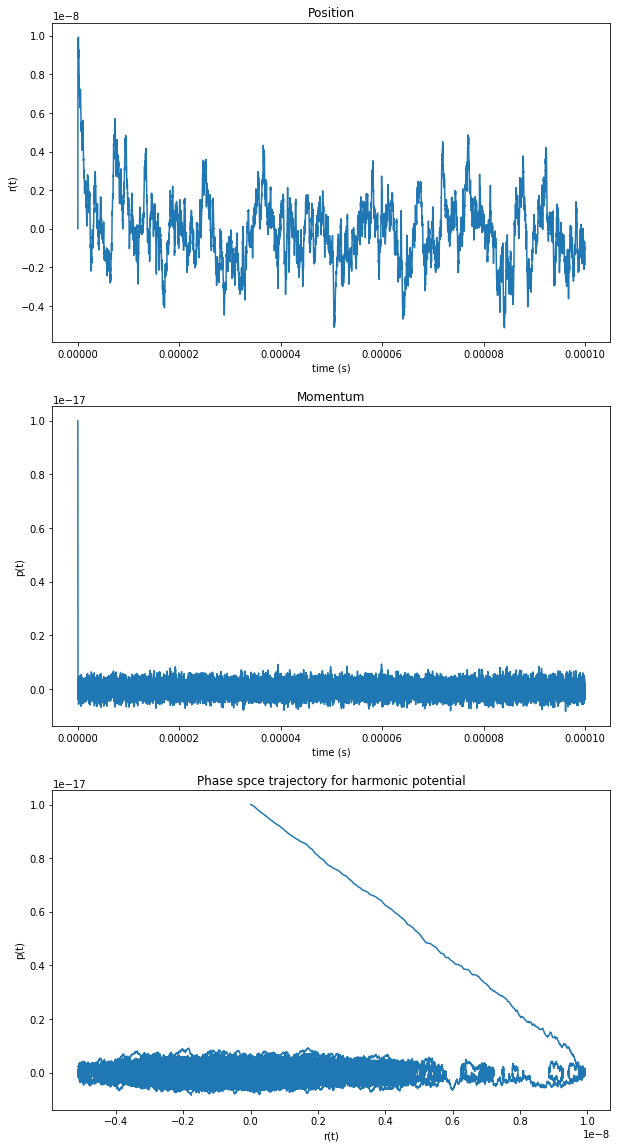

In [137]:
harmonic_langevin = Langevin(parameters, pot_method='harmonic')
harmonic = harmonic_langevin.solve(t_span, dt, p_0, r_0)
harmonic_langevin.plot()

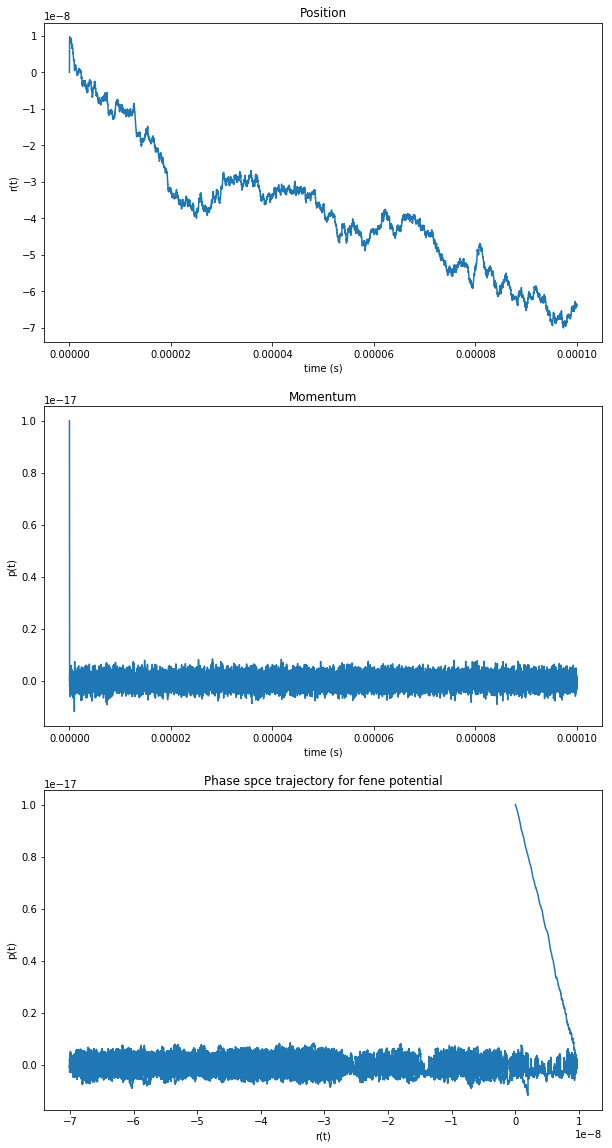

In [138]:
fene_langevin = Langevin(parameters, pot_method='fene')
fene = fene_langevin.solve(t_span, dt, p_0, r_0)
fene_langevin.plot()

### Deterministic case (𝛾 = 0)

In [30]:
GAMMA = 0.000001
parameters2 = {
    'gamma': GAMMA,
    'm': M,
    'v_th': V_TH,
    'w0': W0,
    'r0': R0,
    'k': K
}

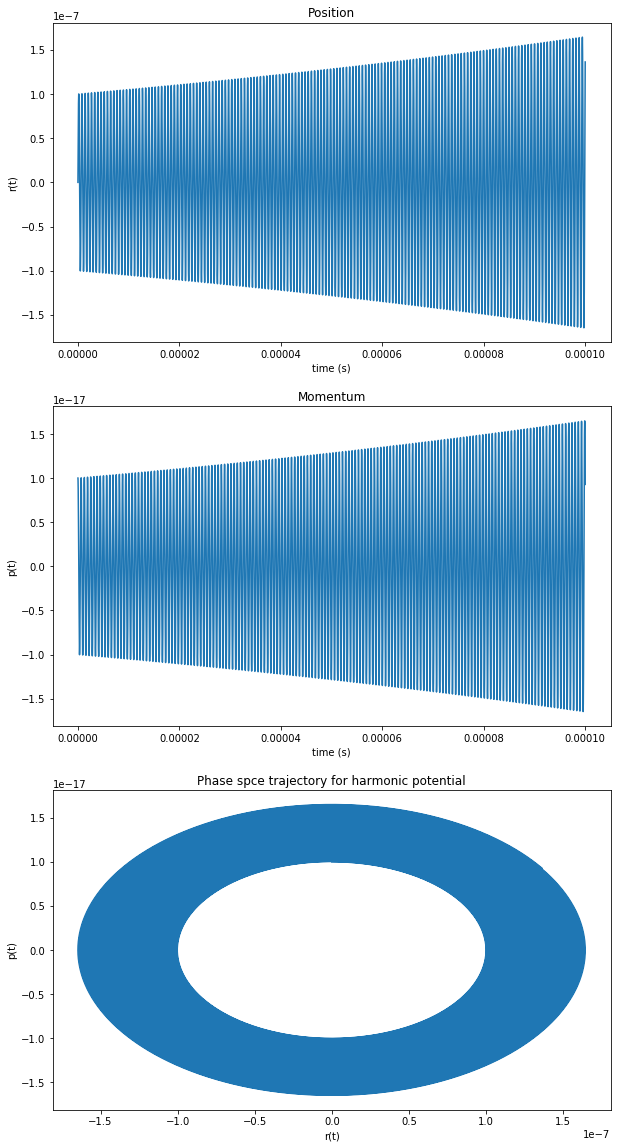

In [31]:
harmonic_langevin_det = Langevin(parameters2, pot_method='harmonic')
harmonic_det = harmonic_langevin_det.solve(t_span, dt, p_0, r_0)
harmonic_langevin_det.plot()

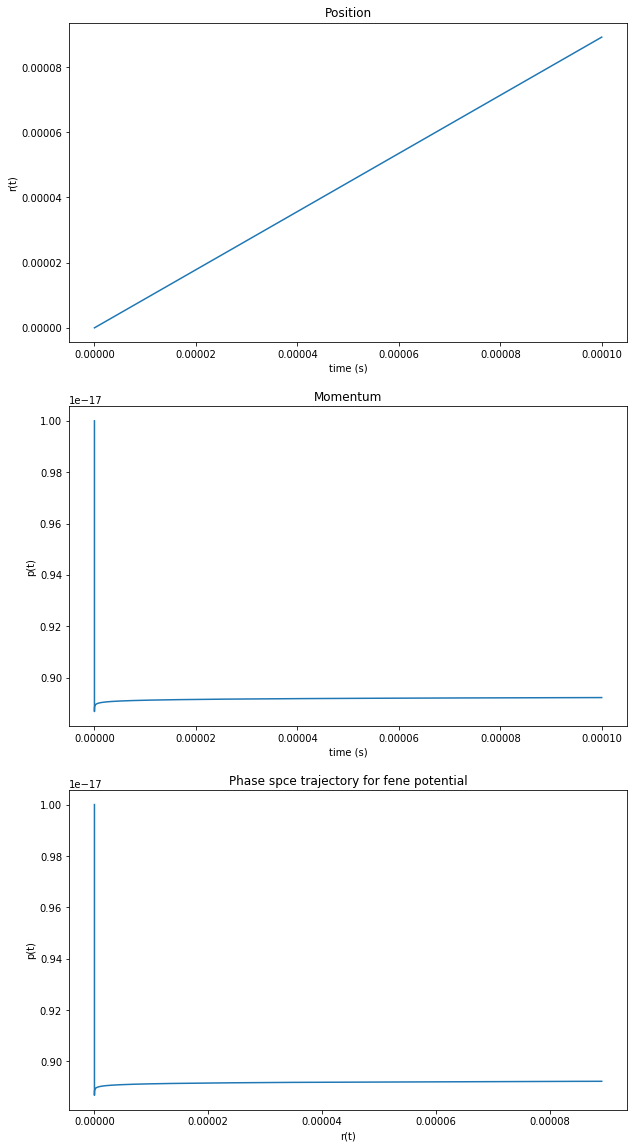

In [32]:
fene_langevin_det = Langevin(parameters2, pot_method='fene')
fene_det = fene_langevin_det.solve(t_span, dt, p_0, r_0)
fene_langevin_det.plot()

### Underdamped case, e.g., 𝜔0 = 5𝛾.

In [33]:
GAMMA = 1/10**-6 #s
W0 = 5*GAMMA
parameters3 = {
    'gamma': GAMMA,
    'm': M,
    'v_th': V_TH,
    'w0': W0,
    'r0': R0,
    'k': K
}

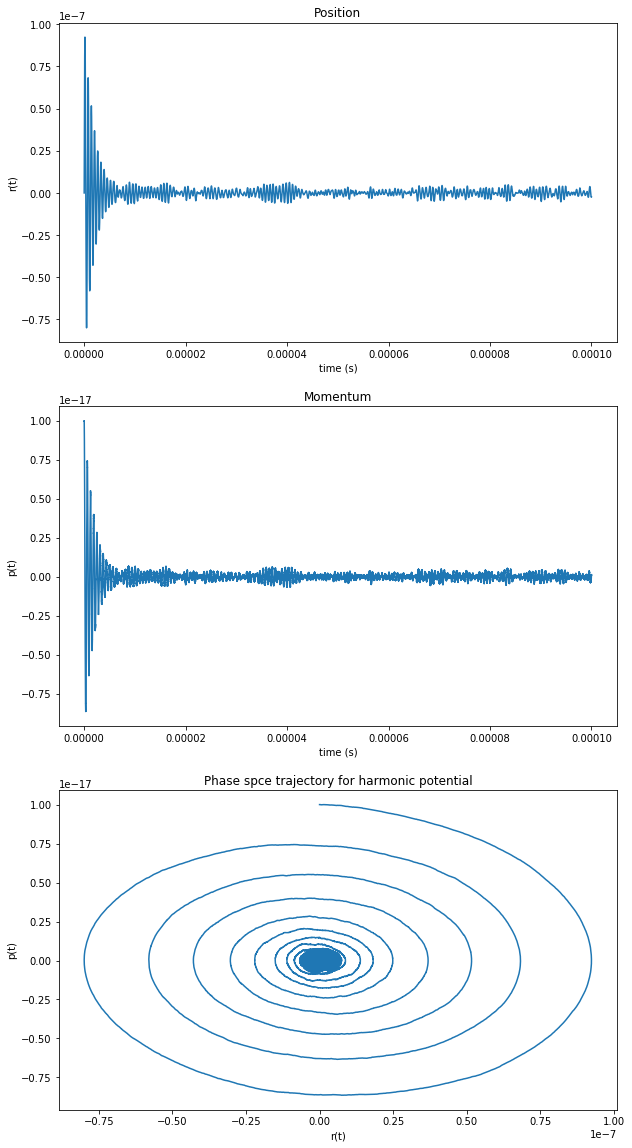

In [34]:
harmonic_langevin_under = Langevin(parameters3, pot_method='harmonic')
harmonic_under = harmonic_langevin_under.solve(t_span, dt, p_0, r_0)
harmonic_langevin_under.plot()

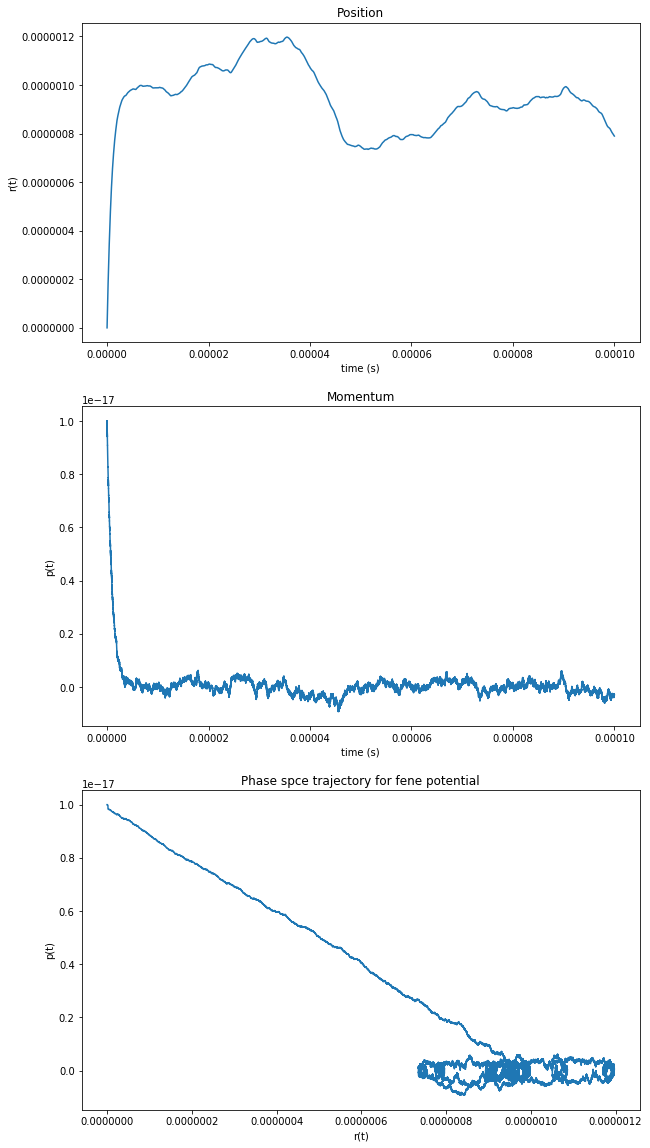

In [35]:
fene_langevin_under = Langevin(parameters3, pot_method='fene')
fene_under = fene_langevin_under.solve(t_span, dt, p_0, r_0)
fene_langevin_under.plot()

## b)

Reaching the equilibrium state with harminic potetnial:

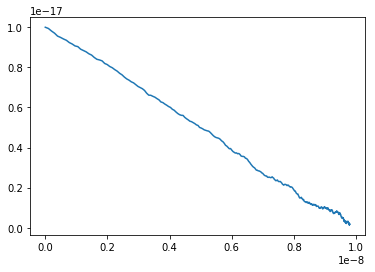

2.5000000000000002e-08


In [98]:
t_eq_harmonic = harmonic.num_steps[250]
plt.plot(harmonic.r[0:400], harmonic.p[0:400])
plt.show()
print(t_eq_harmonic) #4*10**-8 s = 40ns

Reaching the equilibrium state with FENE potetnial:

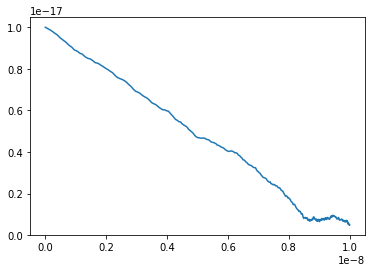

4e-08


In [37]:
t_eq_fene = fene.num_steps[400]
plt.plot(fene.r[0:400], fene.p[0:400])
plt.show()
print(t_eq_fene) #4*10**-8 s = 40ns

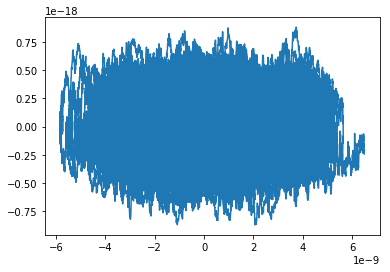

Harminc displacement:  2.004216013260746e-09
Harminc kinetic energy:  2.0184000803953037e-55


In [38]:
plt.plot(harmonic.r[4000:], harmonic.p[4000:])
plt.show()
print('Harminc displacement: ', harmonic_langevin.rms(4000))
print('Harminc kinetic energy: ', harmonic_langevin.kinetic_energy(4000))

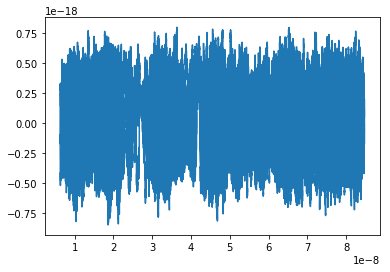

Harminc displacement:  5.02771707433392e-08
Harminc kinetic energy:  2.02731886908254e-55


In [39]:
plt.plot(fene.r[4000:], fene.p[4000:])
plt.show()
print('Harminc displacement: ', fene_langevin.rms(4000))
print('Harminc kinetic energy: ', fene_langevin.kinetic_energy(4000))

## c)

In [96]:
dt = (10**-2)*(1/GAMMA)
print(dt)

1e-08


In [216]:
import scipy.stats as stats


/Users/evabertalan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


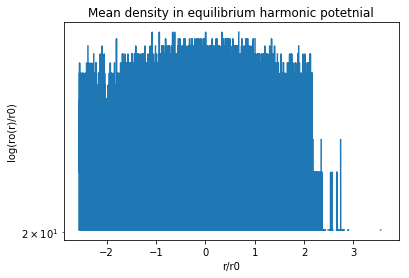

In [221]:
r_eq = harmonic.r[4000:]
ro, bars = np.histogram(r_eq, bins=len(r_eq))

maxwell = stats.maxwell
params = maxwell.fit(r_eq, floc=0)

plt.semilogy(r_eq/R0, np.log(ro/R0))

plt.xlabel('r/r0')
plt.ylabel('log(ro(r)/r0)')
plt.title('Mean density in equilibrium harmonic potential')
plt.show()

/Users/evabertalan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


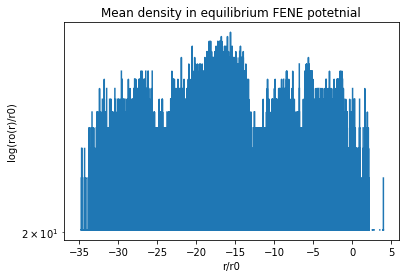

In [222]:
r_eq2 = fene.r[4000:]
ro2, bars = np.histogram(r_eq2, bins=len(r_eq2))
plt.semilogy(r_eq2/R0, np.log(ro2/R0))
plt.xlabel('r/r0')
plt.ylabel('log(ro(r)/r0)')
plt.title('Mean density in equilibrium FENE [potential]')
plt.show()

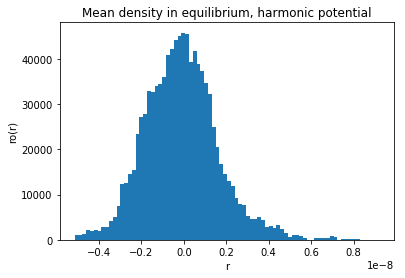

In [239]:
plt.hist(harmonic.r[2000:], bins=80)
plt.xlabel('r')
plt.ylabel('ro(r)')
plt.title('Mean density in equilibrium, harmonic potential')
plt.show()

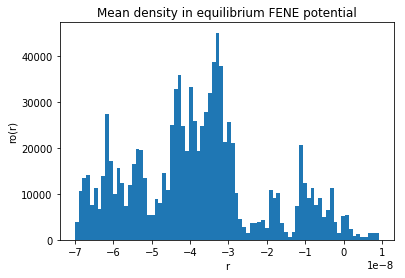

In [238]:
plt.hist(fene.r[2000:], bins=80)
plt.xlabel('r')
plt.ylabel('ro(r)')
plt.title('Mean density in equilibrium, FENE potential')
plt.show()